# Problem Statement

    Use Random Forest to prepare a model on fraud data 
    treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/Fraud_check.csv')
df.head(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [3]:
df.rename({'Marital.Status':'MS','Taxable.Income':'tax',
              'City.Population':'city_pop','Work.Experience':'Work'},inplace=True, axis=1)
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [4]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Undergrad  600 non-null    object
 1   MS         600 non-null    object
 2   tax        600 non-null    int64 
 3   city_pop   600 non-null    int64 
 4   Work       600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,tax,city_pop,Work
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.isna().sum()

Undergrad    0
MS           0
tax          0
city_pop     0
Work         0
Urban        0
dtype: int64

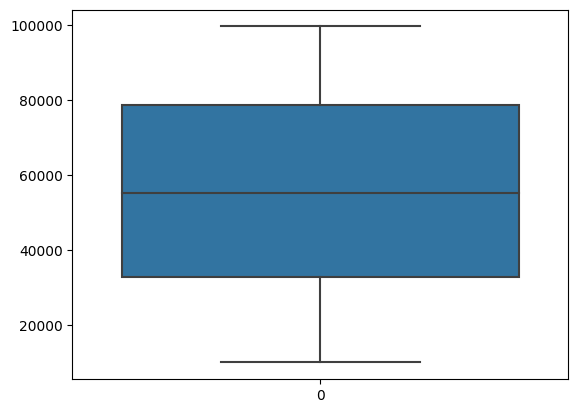

In [7]:
sn= sns.boxplot(df['tax'])

In [8]:
plt.rcParams['figure.dpi']=250

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


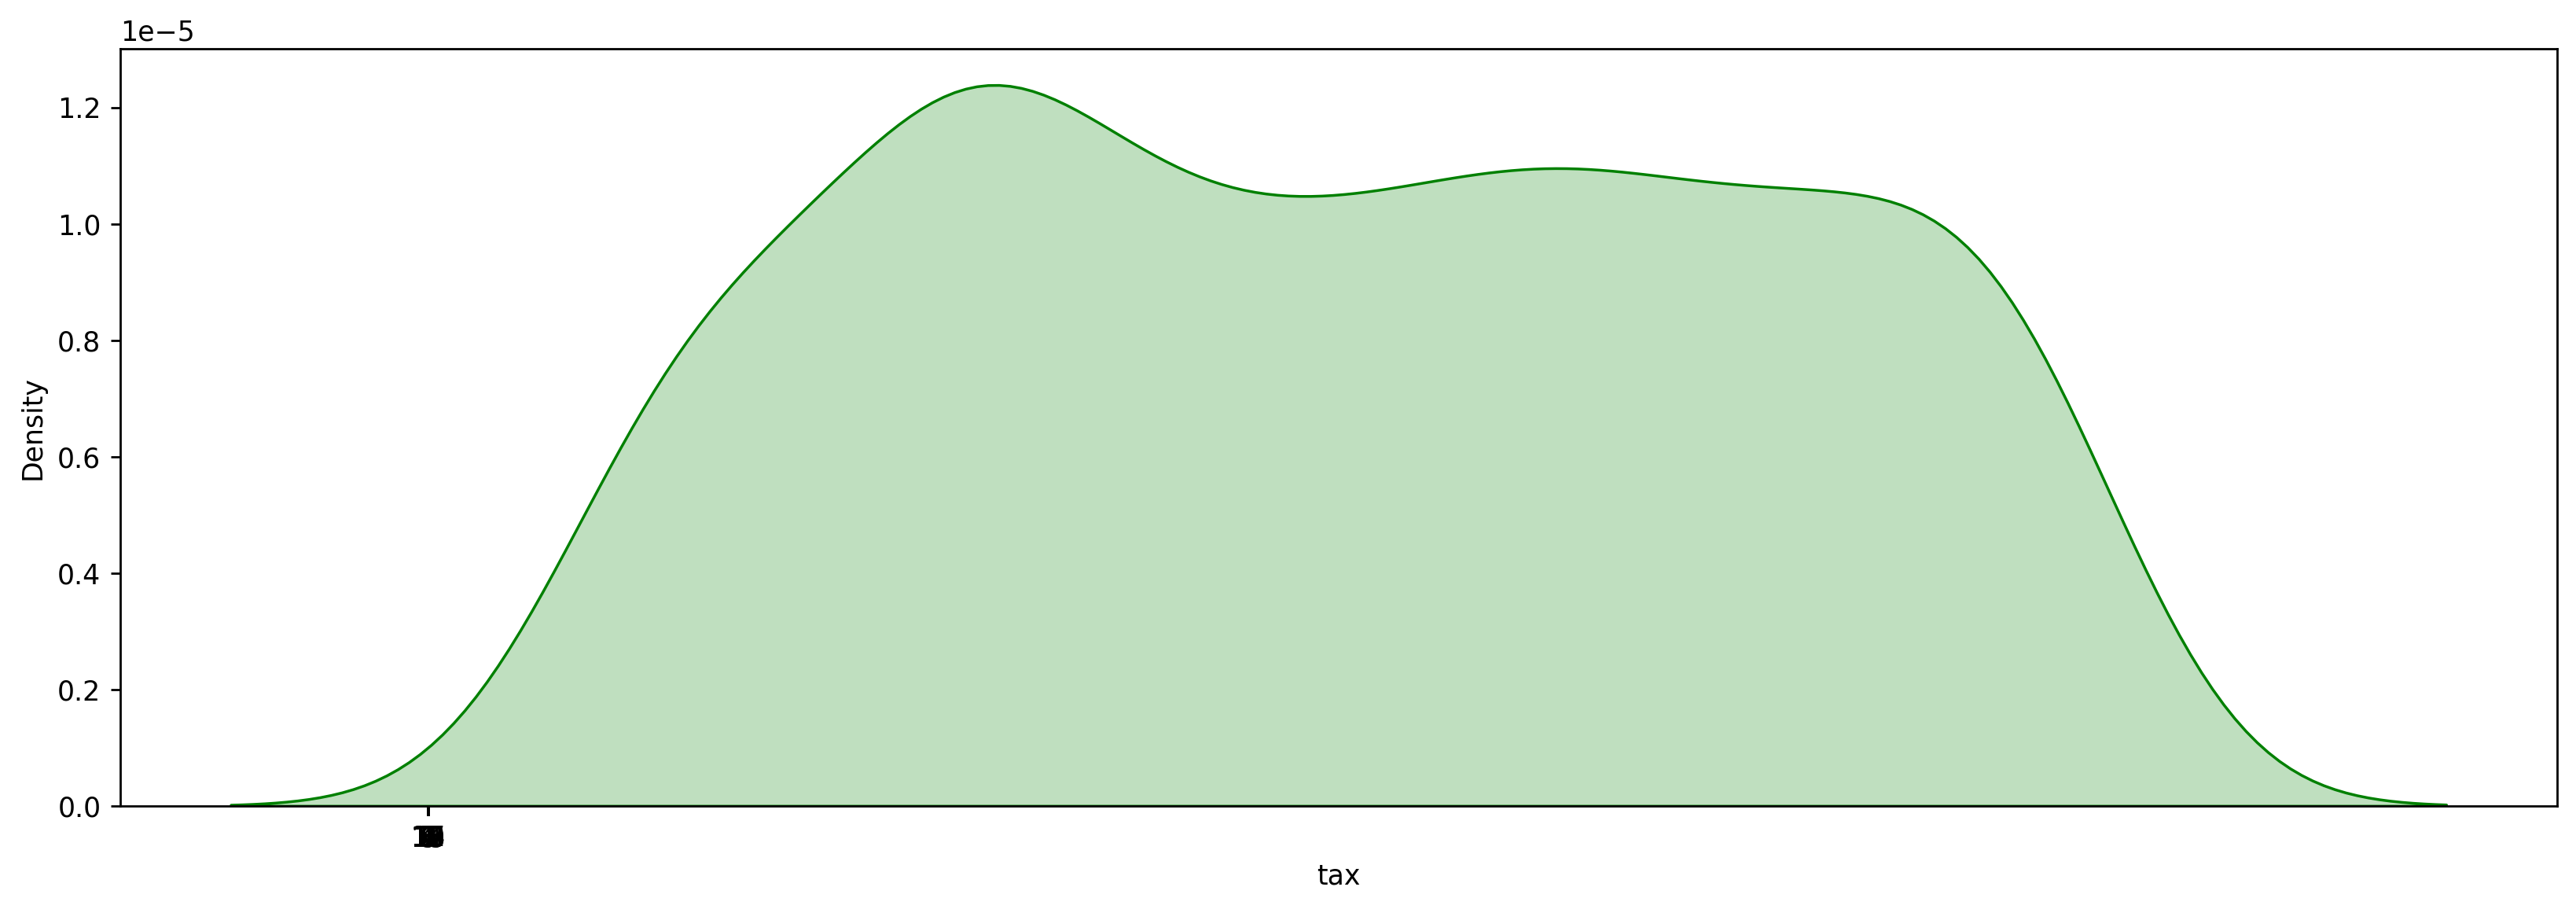

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['tax'].skew()))
print("Kurtosis: {}".format(df['tax'].kurtosis()))
ax = sns.kdeplot(df['tax'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

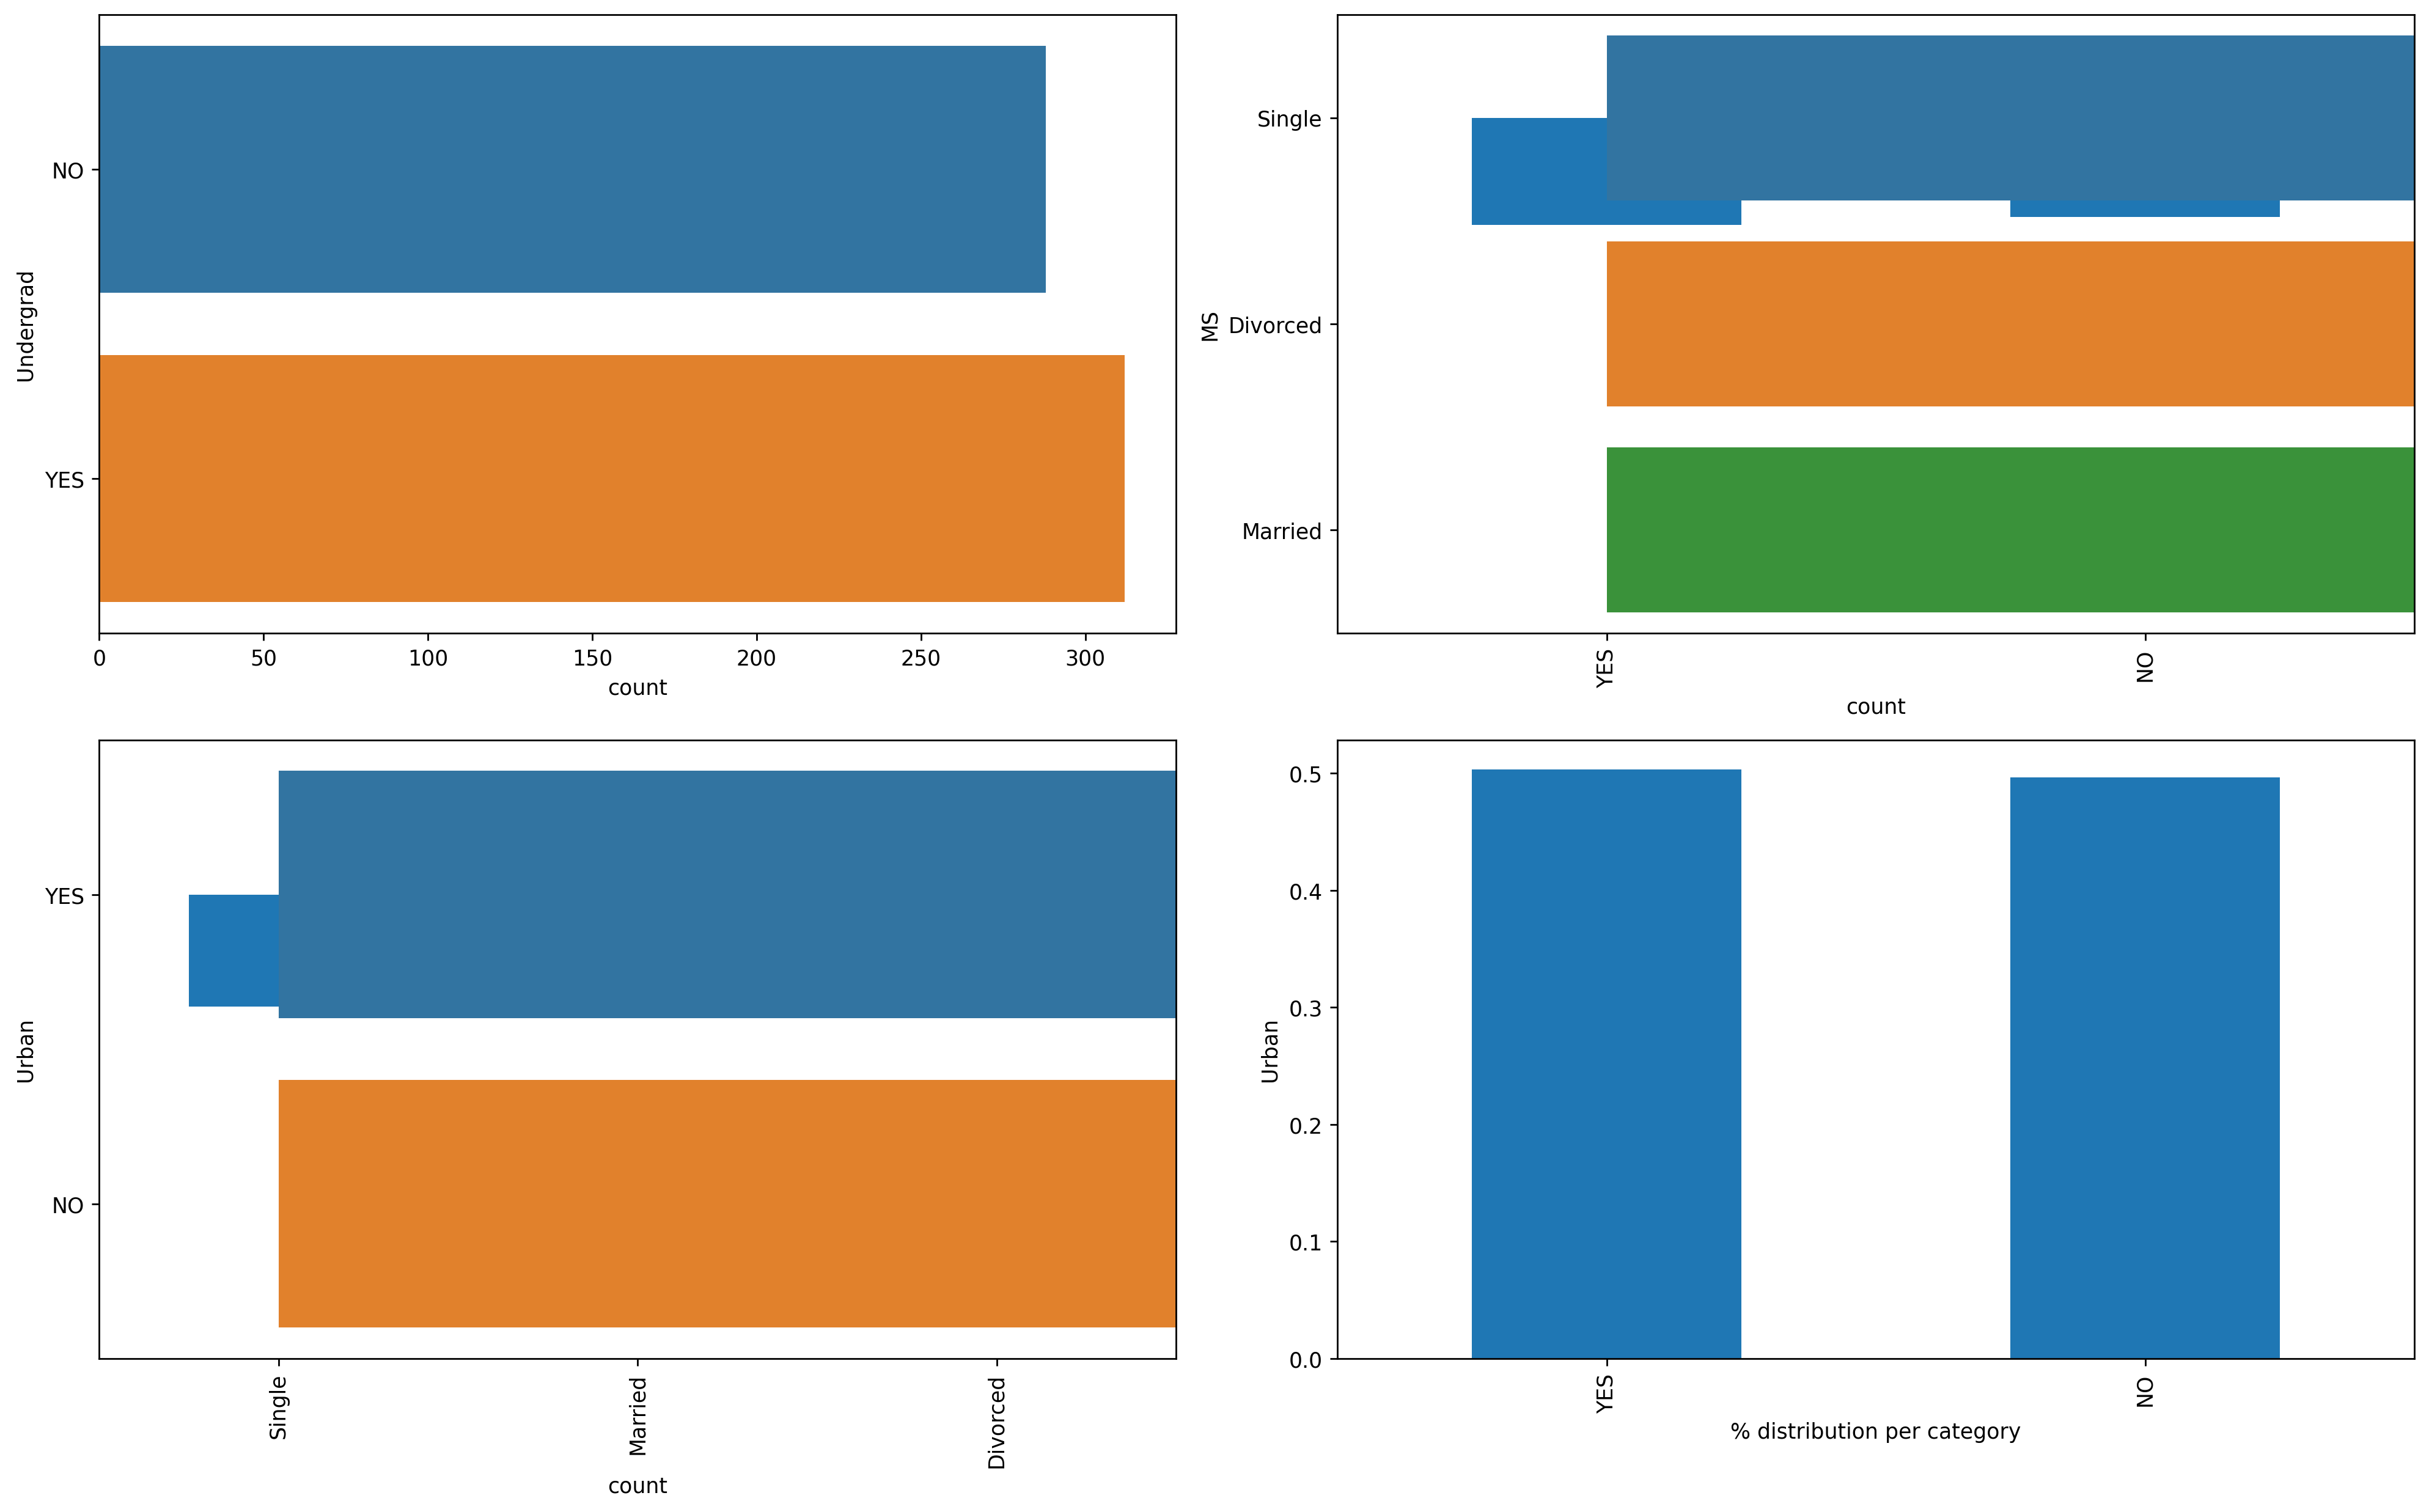

In [10]:
plt.figure(figsize=(16,10))
for i,col in enumerate(['Undergrad', 'MS', 'Urban'],1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

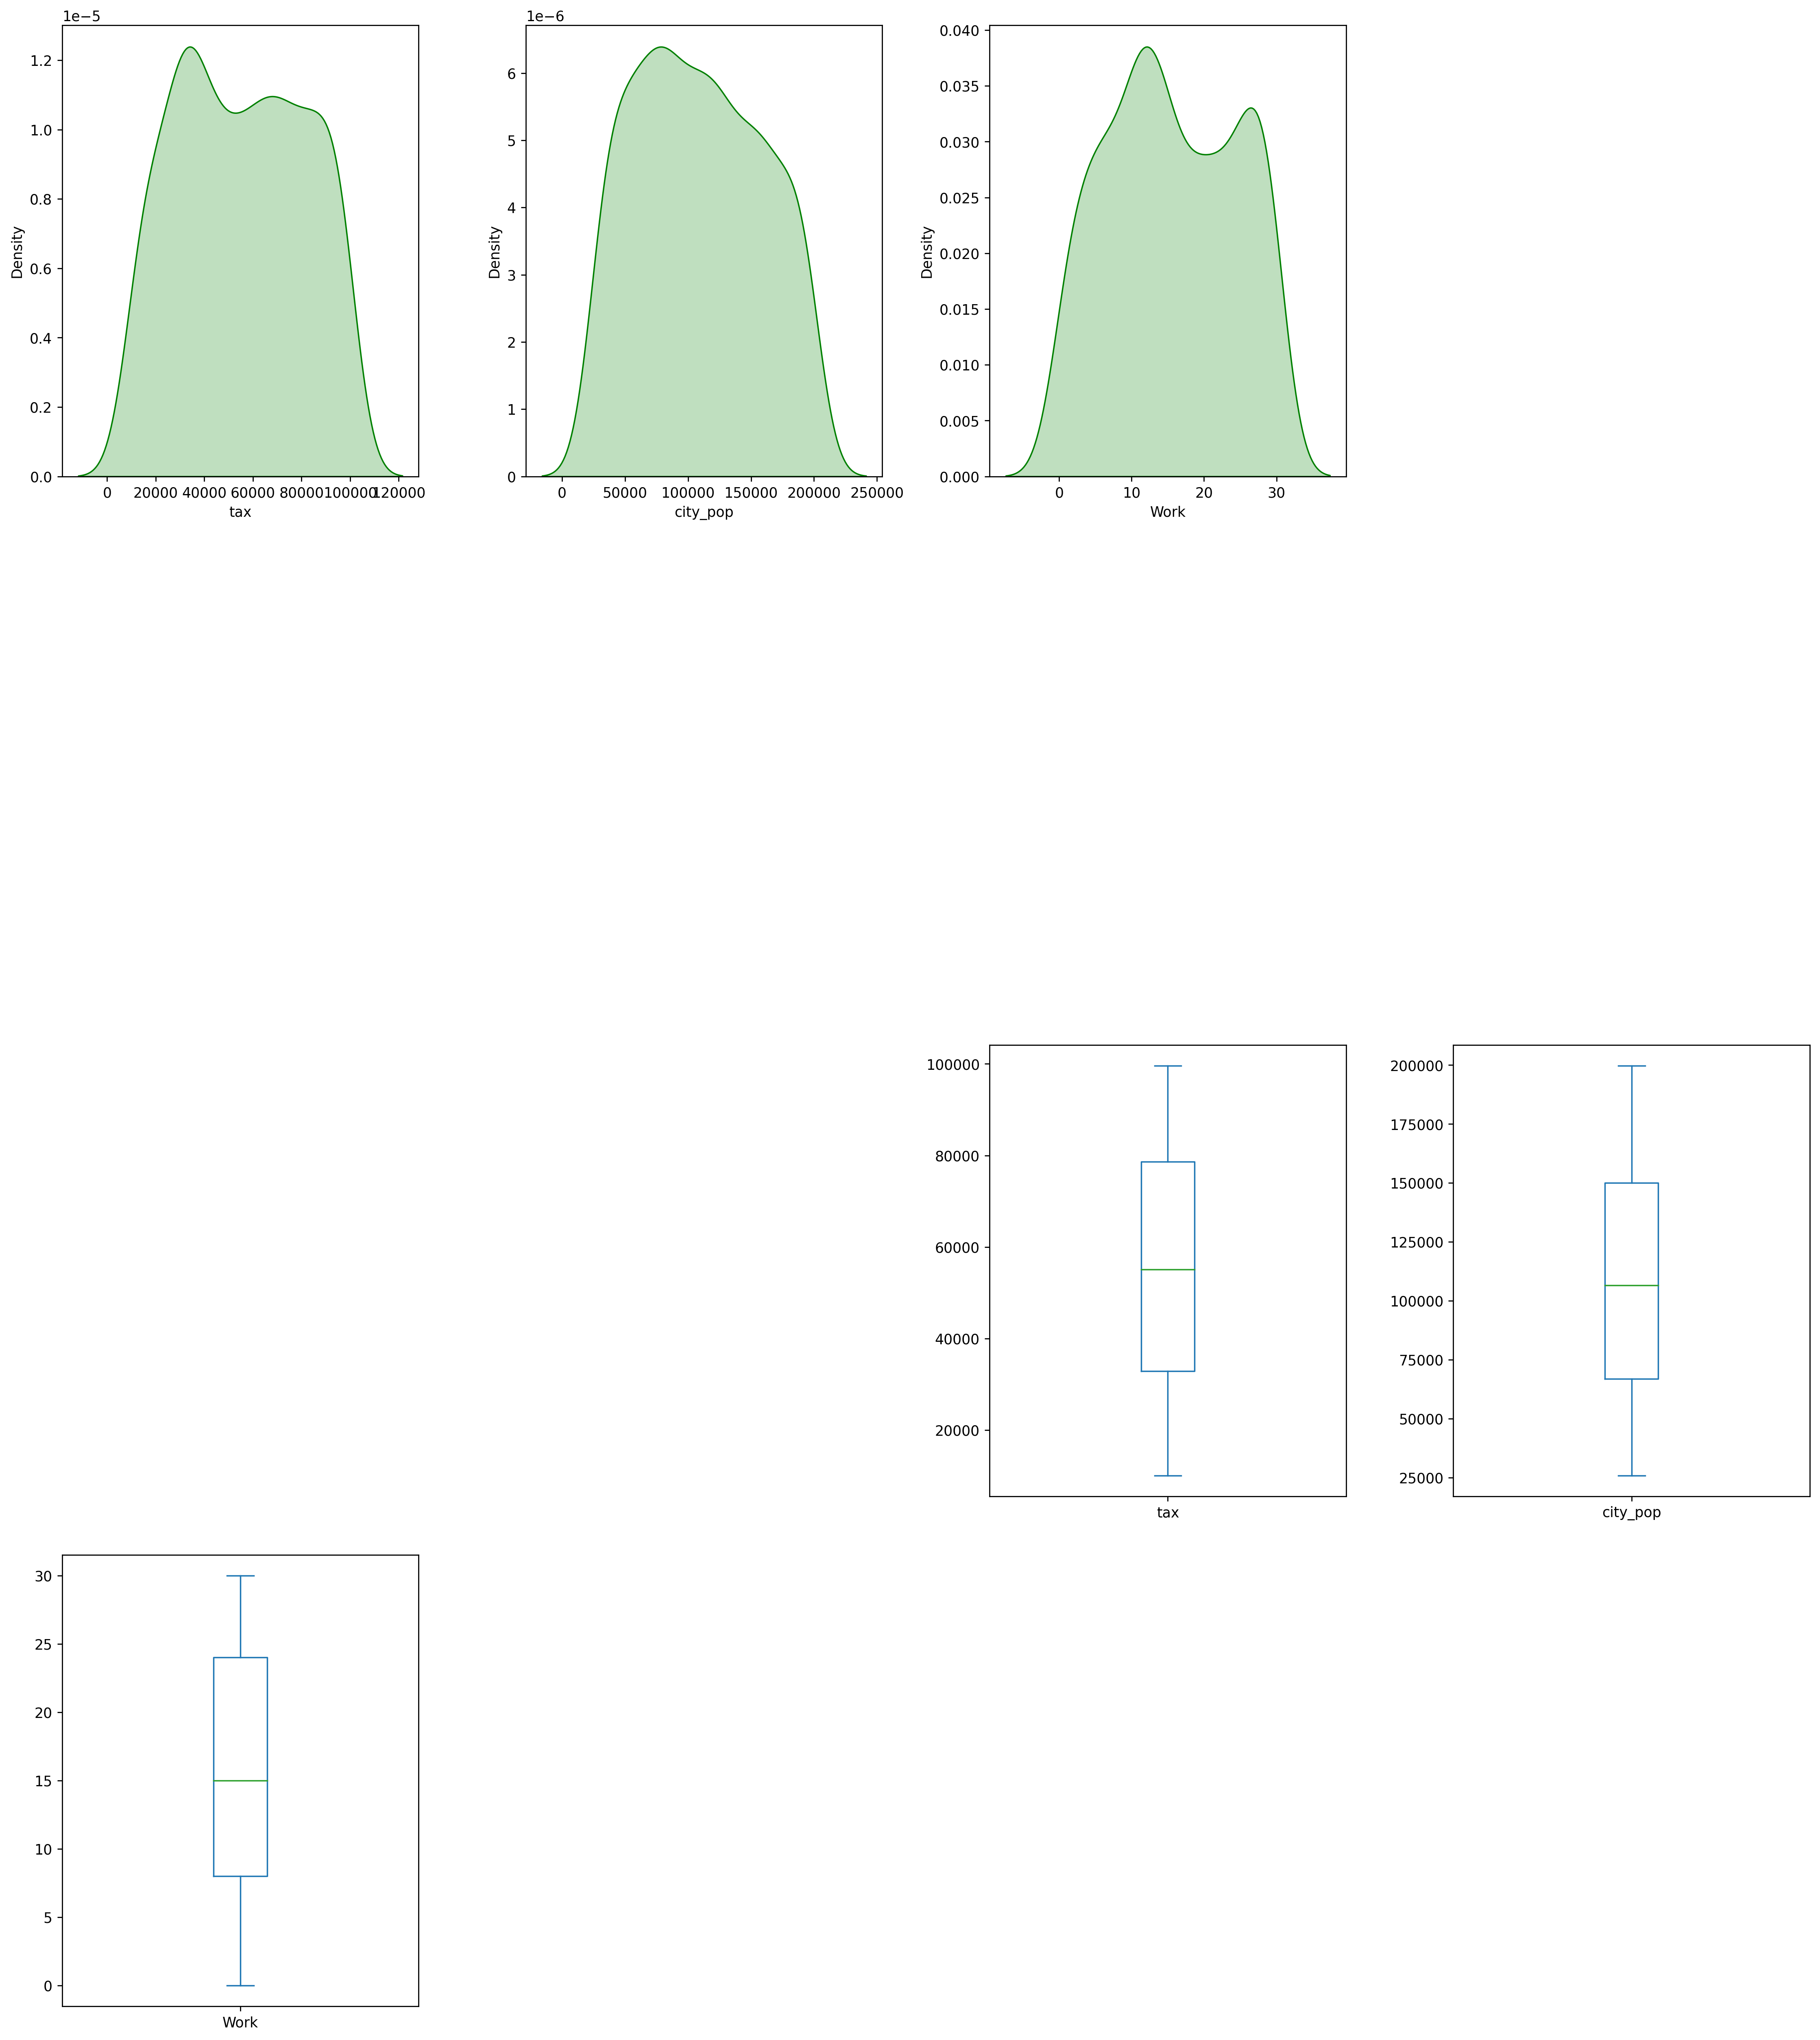

In [11]:
plt.figure(figsize=(18,40))
for i,col in enumerate(['tax','city_pop','Work'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [12]:
df['tax']=df.tax.map(lambda x: 'Risky' if x <=30000
                        else 'Good')
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO


In [13]:
df['tax'].nunique()

2

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Undergrad  600 non-null    object
 1   MS         600 non-null    object
 2   tax        600 non-null    object
 3   city_pop   600 non-null    int64 
 4   Work       600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [15]:
le= LabelEncoder()

df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['MS'] = le.fit_transform(df['MS'])
df['tax'] = le.fit_transform(df['tax'])
df['Urban'] = le.fit_transform(df['Urban'])

In [16]:
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Undergrad  600 non-null    int64
 1   MS         600 non-null    int64
 2   tax        600 non-null    int64
 3   city_pop   600 non-null    int64
 4   Work       600 non-null    int64
 5   Urban      600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [18]:
x=df.iloc[:,[0,1,3,4,5]]
y=df['tax']

In [19]:
x 

,Undergrad,MS,city_pop,Work,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [20]:
y 

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax, Length: 600, dtype: int64

In [21]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [22]:
rf= RandomForestClassifier(criterion='entropy')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       118
           1       0.14      0.03      0.05        32

    accuracy                           0.75       150
   macro avg       0.46      0.49      0.45       150
weighted avg       0.65      0.75      0.69       150



In [24]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7533333333333333


In [25]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [26]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       118
           1       0.10      0.03      0.05        32

    accuracy                           0.73       150
   macro avg       0.44      0.48      0.45       150
weighted avg       0.63      0.73      0.67       150



In [27]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7333333333333333


# Hyperparameter Tunning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
rf= RandomForestClassifier()

param= {
    'criterion': ['gini','entropy'],
    'max_depth':[1,2,3,4,5,6] 
}

In [30]:
grid= GridSearchCV(RandomForestClassifier(),param)

In [31]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [32]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [33]:
rf = RandomForestClassifier(criterion='gini',max_depth=1)

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [34]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  0.7955555555555556
Testing Accuracy:  0.7866666666666666
